# Convolução Analítica

Neste exemplo vamos ver alguns exemplos do cálculo da resposta de sistemas com 1GL em vibração forçada amortecida, submetidos a uma força arbitrária, através da intergral de convolução, calculada analiticamente.

Nem sempre isto será possível.

## Setup

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t   = sp.symbols('t', real=True, positive=True)
tau = sp.symbols('tau', real=True, positive=True)

## Resposta ao impulso unitário

Para facilitar nossa vida, vamos definir a resposta ao impulso unitário,
$$g(t) = \frac{1}{m \omega_d} e^{ -\zeta \omega_n t} \sin \omega_d t.$$

In [2]:
def make_gt(m, c, k):
    wn = np.sqrt(k/m)
    cc = 2.0*m*wn
    zeta = c/cc
    wd = np.sqrt(1-zeta**2)*wn
    return sp.exp(-zeta*wn*t)*sp.sin(wd*t)/(m*wd)

### Quick Check

0.158120998613461*exp(-0.06*t)*sin(6.32427070894344*t)

0.0790578309098102*exp(-0.06*t)*sin(12.6489683373783*t)

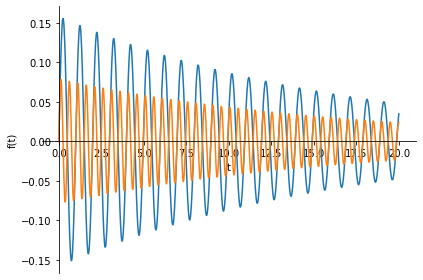

In [3]:
# Just for a quick check
gt1 = make_gt(1, 0.12, 40)
gt2 = make_gt(1, 0.12, 160)
display(gt1)
display(gt2)
p1 = sp.plot(gt1, gt2, (t, 0, 20), adaptive=False, nb_of_points=1000, show=False)
p1.show()

## Convolução

A reposta para $m\ddot x + c \dot x + k x = F(t)$, via Integral de Convolução é dada por:
$$ x(t) = \int_0^t F(\tau)g(t-\tau)\, d\tau.$$

In [4]:
def conv_gt(F, g):
    integrand = F(tau)*g.subs(t, t-tau)
    res = sp.integrate(integrand, (tau, 0, t))
    return res


## Funções 
Vamos definir algumas funções forçantes para facilitar a vida.


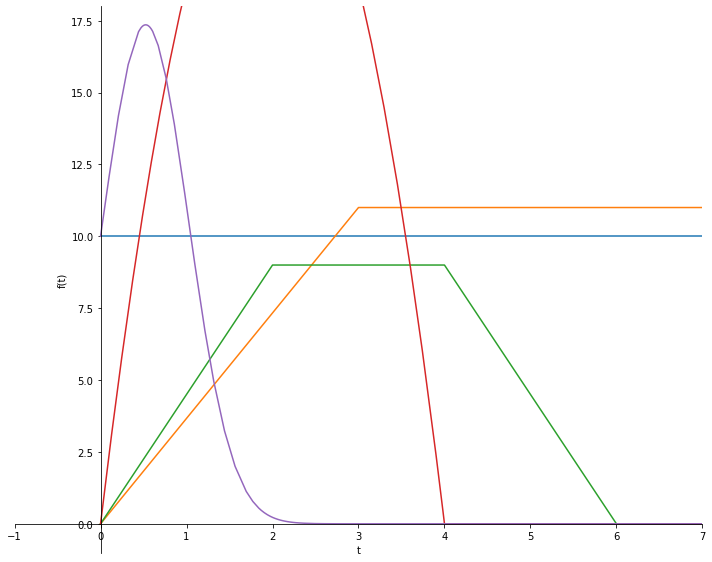

In [5]:
def make_step(A):
    return lambda t: A

def make_ramp(A, time):
    def ramp(t):
        return sp.Piecewise((t*A/time, t<time), (A, True))
    return ramp

def make_up_down(A, time):
    def ramp(t):
        return sp.Piecewise((t*A/time, t<time), (A, t<2*time), (2*A+A*(time-t)/time, t<3*time), (0, True))
    return ramp

def make_quad(A, time):
    time /= 2
    def quad(t):
        return sp.Piecewise((-A/time**2*(t-2*time)*t, t<2*time), (0, True))
    return quad

def make_exp(A, a, b):
     return lambda t: A*sp.exp(a*t-b*t**2)

s = make_step(10)
r = make_ramp(11, 3)
u = make_up_down(9, 2)
q = make_quad(25, 4)
e = make_exp(10, 2.1, 2)

p = sp.plot(s(t), r(t) ,  u(t), q(t), e(t), (t, 0, 9), show=False)
p.axis_center = (0, 0)
p.xlim = (-1, 7)
p.ylim = (-1, 18)
p.size = (10, 8)
p.show()

## Sistema Físico

Vai ser representado diretamente pela sua resposta ao impulso unitário.

In [6]:
gt = make_gt(m=1, c=1.2, k=40)

## Cálculo da resposta


### Degrau

0.25 - 0.0238245351746173*exp(-0.6*t)*sin(6.29603049547888*t) - 0.25*exp(-0.6*t)*cos(6.29603049547888*t)

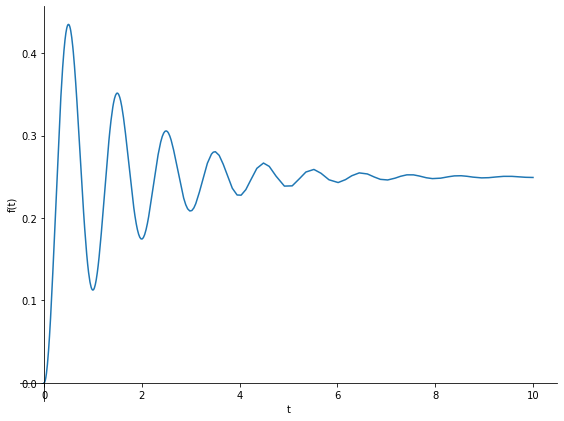

In [7]:
xts = conv_gt(s, gt)
display(xts)
p = sp.plot(xts, (t, 0, 10), show=False)
p.size = (8, 6)
p.show()

### Rampa

0.275 + 0.00873566289735969*exp(-0.6*t)*exp(0.6*Min(3, t))*sin(6.29603049547888*t - 6.29603049547888*Min(3, t))*Min(3, t) - 0.0119096204167337*exp(-0.6*t)*exp(0.6*Min(3, t))*sin(6.29603049547888*t - 6.29603049547888*Min(3, t)) + 0.0916666666666667*exp(-0.6*t)*exp(0.6*Min(3, t))*cos(6.29603049547888*t - 6.29603049547888*Min(3, t))*Min(3, t) - 0.27775*exp(-0.6*t)*exp(0.6*Min(3, t))*cos(6.29603049547888*t - 6.29603049547888*Min(3, t)) - 0.0142973682753454*exp(-0.6*t)*sin(6.29603049547888*t) + 0.00275*exp(-0.6*t)*cos(6.29603049547888*t)

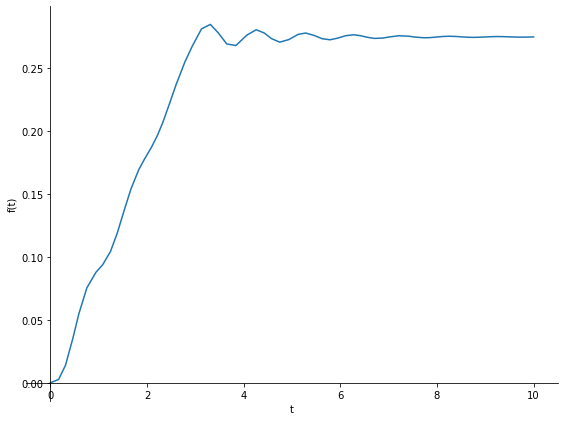

In [8]:
xtr = conv_gt(r, gt)
display(xtr)
p = sp.plot(xtr, (t, 0, 10), show=False)
p.size = (8, 6)
p.show()

### Up Down

0.0107210408285778*exp(-0.6*t)*exp(0.6*Min(2, t))*sin(6.29603049547888*t - 6.29603049547888*Min(2, t))*Min(2, t) - 0.00389531150104993*exp(-0.6*t)*exp(0.6*Min(2, t))*sin(6.29603049547888*t - 6.29603049547888*Min(2, t)) + 0.1125*exp(-0.6*t)*exp(0.6*Min(2, t))*cos(6.29603049547888*t - 6.29603049547888*Min(2, t))*Min(2, t) - 0.228375*exp(-0.6*t)*exp(0.6*Min(2, t))*cos(6.29603049547888*t - 6.29603049547888*Min(2, t)) + 0.0107210408285778*exp(-0.6*t)*exp(0.6*Min(4, t))*sin(6.29603049547888*t - 6.29603049547888*Min(4, t))*Min(4, t) - 0.0253373931582056*exp(-0.6*t)*exp(0.6*Min(4, t))*sin(6.29603049547888*t - 6.29603049547888*Min(4, t)) + 0.1125*exp(-0.6*t)*exp(0.6*Min(4, t))*cos(6.29603049547888*t - 6.29603049547888*Min(4, t))*Min(4, t) - 0.453375*exp(-0.6*t)*exp(0.6*Min(4, t))*cos(6.29603049547888*t - 6.29603049547888*Min(4, t)) - 0.0107210408285778*exp(-0.6*t)*exp(0.6*Min(6, t))*sin(6.29603049547888*t - 6.29603049547888*Min(6, t))*Min(6, t) + 0.0467794748153612*exp(-0.6*t)*exp(0.6*Min(6, t)

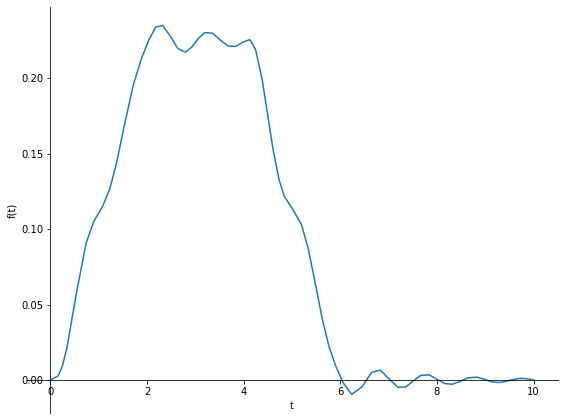

In [9]:
xtu = conv_gt(u, gt)
display(xtu)
p = sp.plot(xtu, (t, 0, 10), show=False)
p.size = (8, 6)
p.depth = 13
p.show()

### Quadrática

-0.0148903344841354*exp(-0.6*t)*exp(0.6*Min(4.0, t))*sin(6.29603049547888*t - 6.29603049547888*Min(4.0, t))*Min(4.0, t)**2 + 0.0108203097251387*exp(-0.6*t)*exp(0.6*Min(4.0, t))*sin(6.29603049547888*t - 6.29603049547888*Min(4.0, t))*Min(4.0, t) + 0.0996888039933583*exp(-0.6*t)*exp(0.6*Min(4.0, t))*sin(6.29603049547888*t - 6.29603049547888*Min(4.0, t)) - 0.15625*exp(-0.6*t)*exp(0.6*Min(4.0, t))*cos(6.29603049547888*t - 6.29603049547888*Min(4.0, t))*Min(4.0, t)**2 + 0.634375*exp(-0.6*t)*exp(0.6*Min(4.0, t))*cos(6.29603049547888*t - 6.29603049547888*Min(4.0, t))*Min(4.0, t) - 0.01121875*exp(-0.6*t)*exp(0.6*Min(4.0, t))*cos(6.29603049547888*t - 6.29603049547888*Min(4.0, t)) - 0.0996888039933583*exp(-0.6*t)*sin(6.29603049547888*t) + 0.01121875*exp(-0.6*t)*cos(6.29603049547888*t)

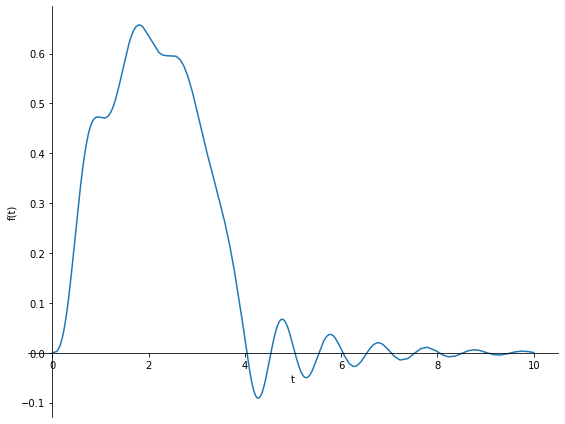

In [10]:
xtq = conv_gt(q, gt)
display(xtq)
p = sp.plot(xtq, (t, 0, 10), show=False)
p.size = (8, 6)
p.depth = 13
p.show()

### Exponencial

1.58830234497449*exp(-0.6*t)*Integral(exp(2.7*tau)*exp(-2*tau**2)*sin(6.29603049547888*t - 6.29603049547888*tau), (tau, 0, t))

/home/ramiro/envs/jupyter/lib/python3.10/site-packages/sympy/plotting/experimental_lambdify.py:188: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  return self.__call__(args)


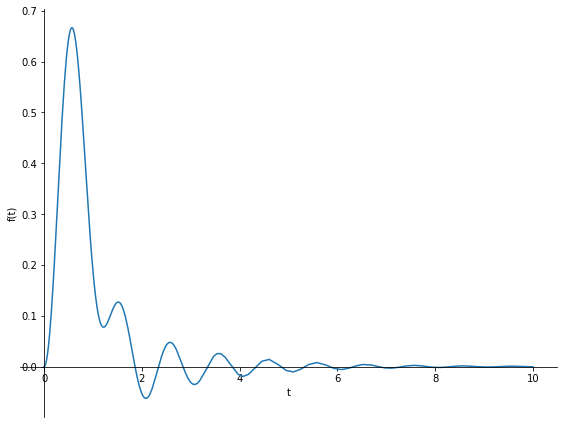

In [11]:
xte = conv_gt(e, gt)
display(xte)
p = sp.plot(xte, (t, 0, 10), show=False)
p.size = (8, 6)
p.depth = 13
p.show()